# Top box office movies analysis

## 為何選擇分析這些資料?
在我們看電影前，總是會去看看電影的評價來作為一種選擇的依據
反過來說，在
民眾對於電影的評價是否會影響到電影的票房
或者是說電影的票房是否可以反映出該電影值得看的程度
想了解電影票房和電影的評價是否有實質的關係
若票房與評價有高度相關，那可以推斷多數人會參考電影的評價而選擇進電影院

In [ ]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from requests_html import HTMLSession
%matplotlib inline

def change_money(str):
    try:
        money = int(str.replace(',', ''))
        return money
    except Exception as e:
        str = str.replace(',', '')
        for i in str:
            if i.isalpha():
                str.replace(i, '')
                
''' get ranking list '''
wiki_url = 'https://en.wikipedia.org/wiki/List_of_highest-grossing_films'
session = HTMLSession()
response = session.get(wiki_url)
titles = response.html.find('.wikitable')[0].find('i')
ranking_list = []
for title in titles:
    ranking_list.append(title.text)

''' get IMDb data '''
api_key = '2455a527'
year = ''
plot = 'full'

IMDb_rating = []
rotten_tomato_rating = []
for title in ranking_list:
    url = 'http://www.omdbapi.com/?t=' + title + '&y=' + year + 'plot=' + plot + '&apikey=' + api_key
    r = requests.get(url)
    try:
        data = json.loads(r.text)
        score = data['Ratings'][0]['Value']
        score = str(score).split('/')[0]
        score = float(score)
        IMDb_rating.append(score)
    except Exception as e:
        IMDb_rating.append(None)
        
    try:
        score_r = data['Ratings'][1]['Value']
        score_r = score_r.split('%')[0]
        score_r = int(score_r)
        rotten_tomato_rating.append(score_r)
    except Exception as e:
        rotten_tomato_rating.append(None)

''' using pandas '''
# movie_series = pd.Series(ranking_list, index=IMDb_rating)

dict = {'title': ranking_list, 'IMDb_rating': IMDb_rating, 'Rotten_tomato_rating': rotten_tomato_rating}
movie_frame = pd.DataFrame(dict)
print(movie_frame.head())


''' money list '''
money_list = []
box_office = response.html.find('.wikitable')[0].find('tbody [align=right]')
# print(box_office)
for money in box_office:
    m = change_money(money.text.split('$')[1])
    money_list.append(m)
# print(money_list)


## Top 50 box office movie's rating

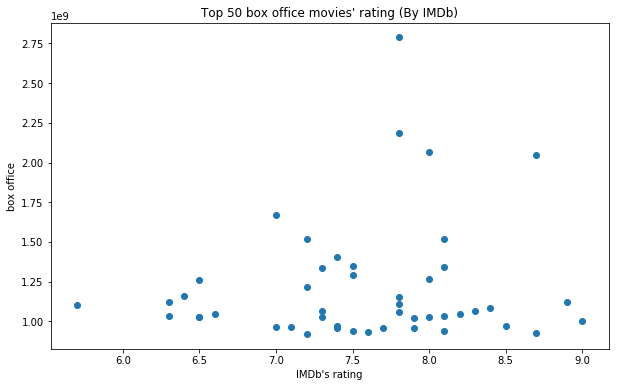

In [53]:
plt.figure(figsize=(10, 6))
plt.title('Top 50 box office movies\' rating (By IMDb)')
plt.scatter(movie_frame['IMDb_rating'], money_list)
plt.xlabel('IMDb\'s rating')
plt.ylabel('box office');
# plt.show()

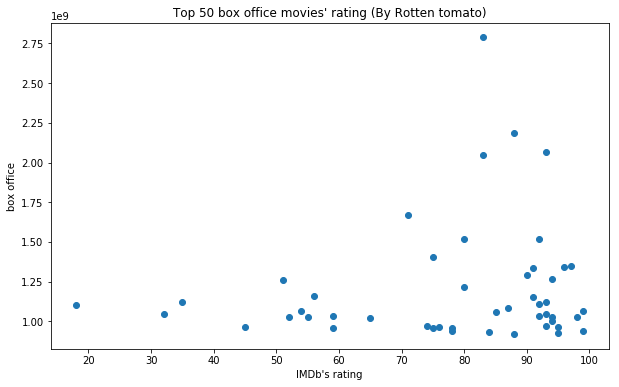

In [52]:
plt.figure(figsize=(10, 6))
plt.title('Top 50 box office movies\' rating (By Rotten tomato)')
plt.scatter(movie_frame['Rotten_tomato_rating'], money_list)
plt.xlabel('IMDb\'s rating')
plt.ylabel('box office');
# plt.show()

## total movies of each rating

## Average : 6.39 
reference : https://www.quora.com/What-is-an-average-rating-on-IMDB-for-a-movie

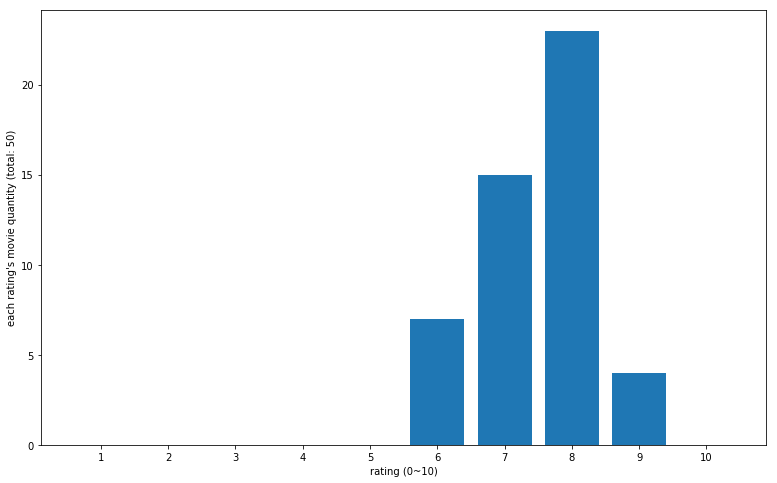

In [50]:
plt.figure(figsize=(13, 8))
ranking_statistics = [0] * 10
# print(IMDb_rating)
for rating in IMDb_rating:
    try:                                         # in case of None value
        # rating_int = int(rating)
        rating_int = round(rating)
        ranking_statistics[rating_int - 1] += 1
    except Exception as e:
        pass
rate = list(range(1, 11))
plt.bar(rate, ranking_statistics)
plt.xlabel('rating (0~10)')
plt.ylabel('each rating\'s movie quantity (total: 50)')
plt.xticks(rate, rate);

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 2, 0, 1, 2, 3, 4, 3, 2, 1, 1, 1, 2, 0]


<BarContainer object of 100 artists>

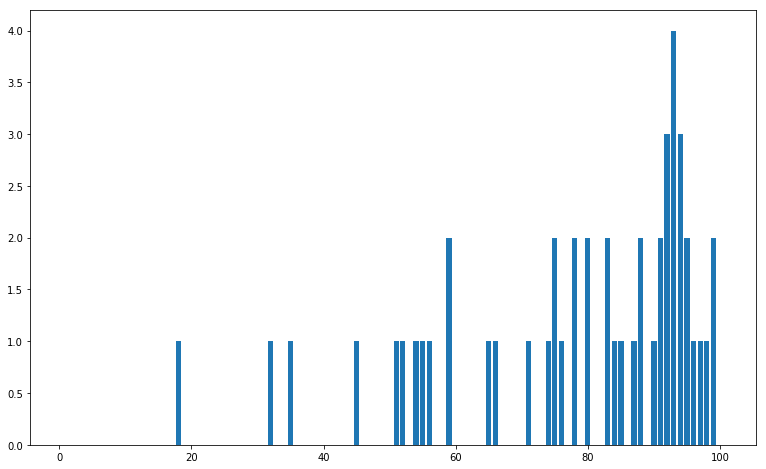

In [31]:
plt.figure(figsize=(13, 8))
ranking_statistics = [0] * 100
for rating in rotten_tomato_rating:
    try:
        ranking_statistics[rating - 1] += 1
    except Exception as e:
        pass
# print(ranking_statistics)
rate = list(range(1, 101))
plt.bar(rate, ranking_statistics)

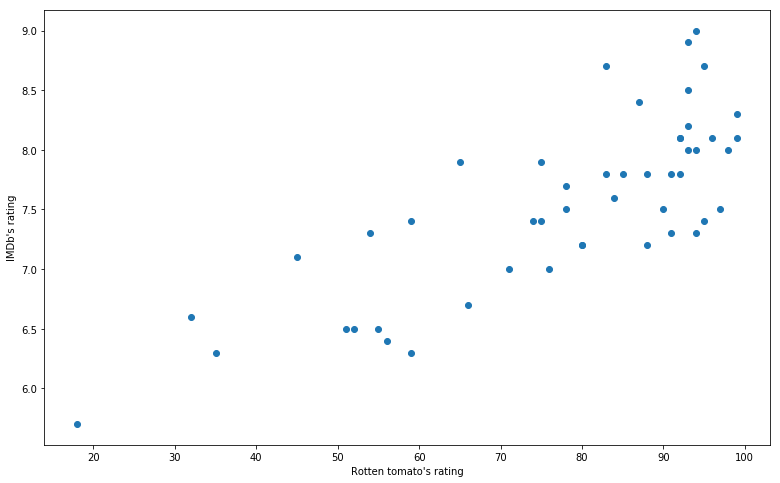

In [46]:
plt.figure(figsize=(13, 8))
plt.scatter(movie_frame['Rotten_tomato_rating'], movie_frame['IMDb_rating'])
plt.xlabel('Rotten tomato\'s rating')
plt.ylabel('IMDb\'s rating');
# plt.show()

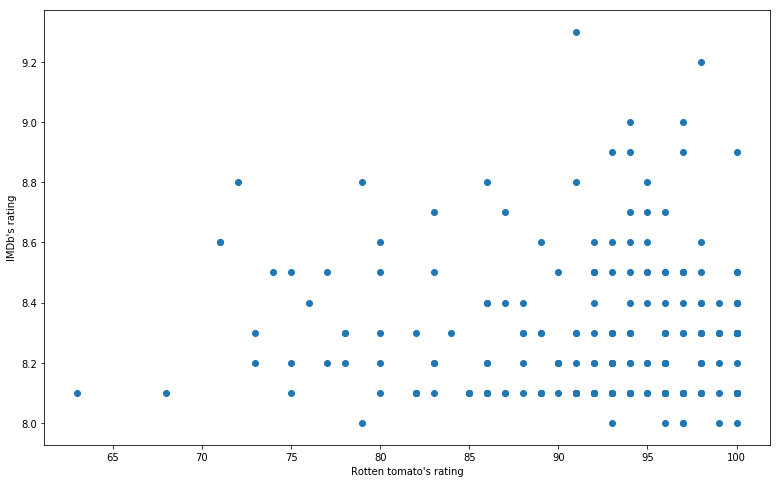

In [47]:
''' get ranking list '''
imdb_url = 'https://www.imdb.com/chart/top'
session = HTMLSession()
response = session.get(imdb_url)
titles = response.html.find('.chart tbody .titleColumn a')

rating_list = []
for title in titles:
    rating_list.append(title.text)
    
api_key = '2455a527'
year = ''
plot = 'full'
IMDb_rating2 = []
rotten_tomato_rating2 = []
for title in rating_list:
    url = 'http://www.omdbapi.com/?t=' + title + '&y=' + year + 'plot=' + plot + '&apikey=' + api_key
    r = requests.get(url)
    # print(r.text)
    data = json.loads(r.text)
    try:
        score = data['Ratings'][0]['Value']
        score = score.split('/')[0]
        score = float(score)
        IMDb_rating2.append(score)
    except Exception as e:
        IMDb_rating2.append(None)

    try:
        score_r = data['Ratings'][1]['Value']
        score_r = score_r.split('%')[0]
        score_r = float(score_r)
        rotten_tomato_rating2.append(score_r)
    except Exception as e:
        rotten_tomato_rating2.append(None)
        
# dict2 = {'title': ranking_list, 'IMDb_rating': IMDb_rating2, 'Rotten_tomato_rating': rotten_tomato_rating2}
# movie_frame2 = pd.DataFrame(dict2)
# # print(movie_frame.head())

plt.figure(figsize=(13, 8))
plt.scatter(rotten_tomato_rating2, IMDb_rating2)
plt.xlabel('Rotten tomato\'s rating')
plt.ylabel('IMDb\'s rating');
# plt.show()

## 從資料中觀察到的現象
在蒐集全球票房前50高的電影後，比對 IMDb 對這些電影的評分